<a href="https://colab.research.google.com/github/luvr1/CCMACLRL_EXERCISES/blob/main/Reyes_Exercise2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2 B

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm

In [3]:
df = pd.read_excel('traveldata.xlsx')

In [4]:
df

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8
5,77,3,3.57,6.4
6,80,3,3.03,7.0
7,66,2,3.51,5.6
8,109,5,3.54,7.3
9,76,3,3.25,6.4


## A. Correlation

### Check the relationships between each independent variable and the dependent variable using scatterplots and correlations.

1. Create scatter plot between miles traveled and travel time

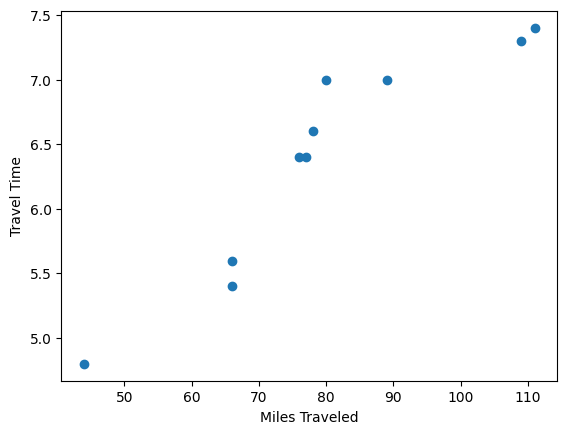

In [5]:
plt.scatter(df["Miles Traveled"], df["Travel Time"])
plt.xlabel("Miles Traveled")
plt.ylabel("Travel Time")
plt.show()

2. Create scatter plot between number of deliveries and travel time

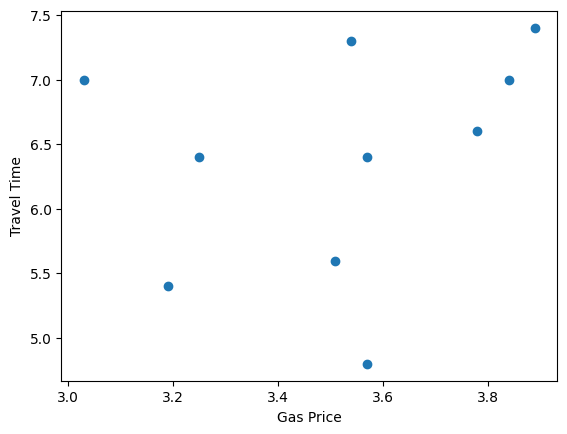

In [6]:
plt.scatter(df['Gas Price'], df['Travel Time'])
plt.xlabel('Gas Price')
plt.ylabel('Travel Time')
plt.show()

3. Create scatter plot between Gas Price and Travel time

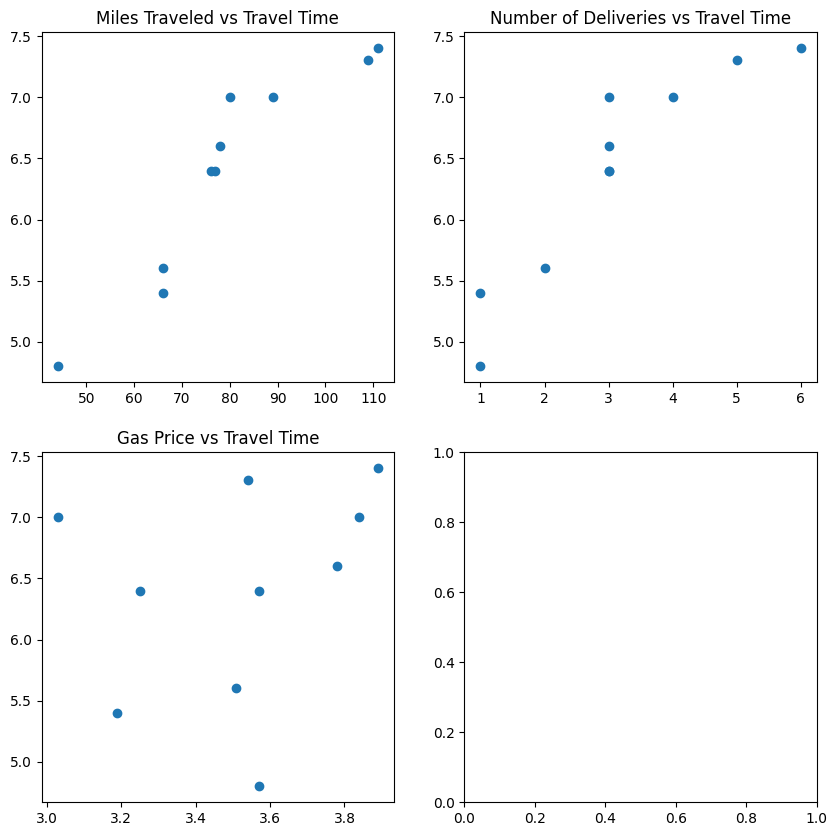

In [7]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].scatter(df['Miles Traveled'], df['Travel Time'])
ax[0,1].scatter(df["Number of Deliveries"], df["Travel Time"])
ax[1,0].scatter(df["Gas Price"], df["Travel Time"])

ax[0,0].set_title("Miles Traveled vs Travel Time")
ax[0,1].set_title("Number of Deliveries vs Travel Time")
ax[1,0].set_title("Gas Price vs Travel Time")
plt.show()

4. Create a pairplot

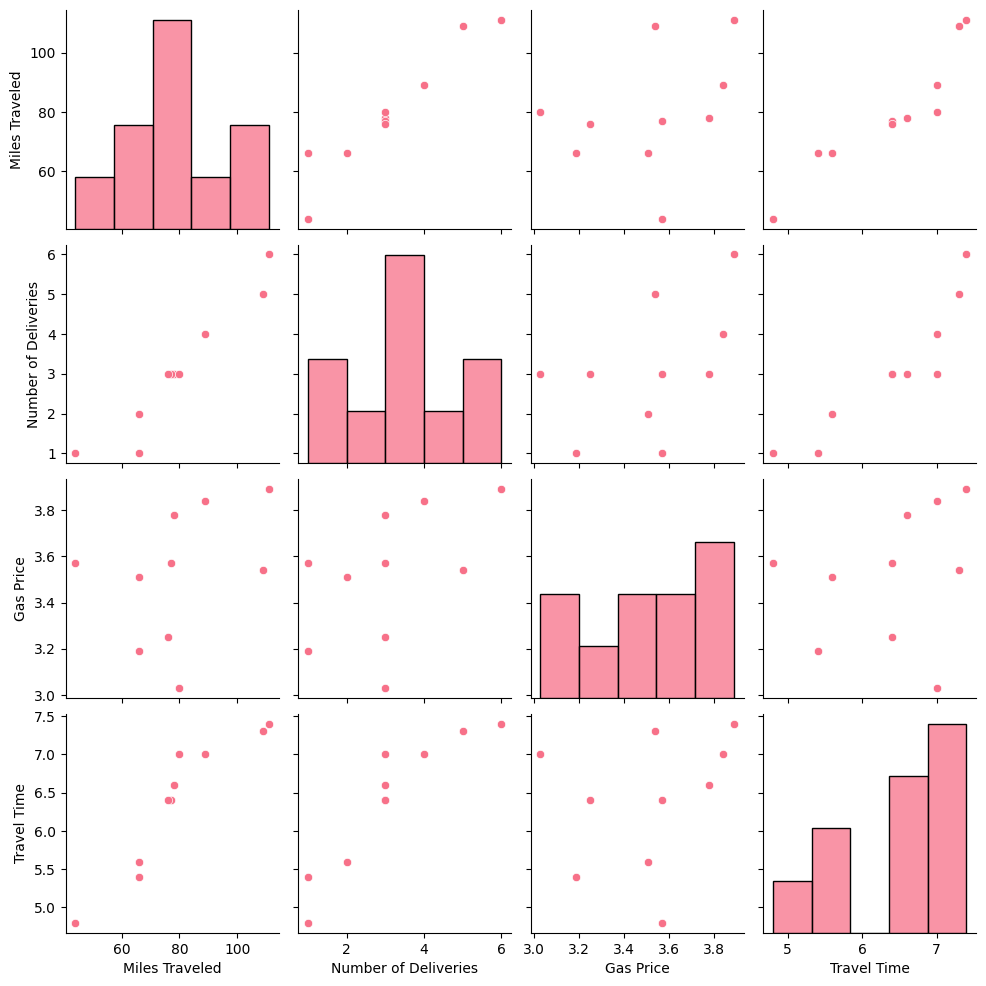

In [8]:
sns.set_palette("husl")
sns.pairplot(df)
plt.show()

5. Calculate pearson's correlation coefficient and p-value between Miles Traveled and Travel Time

In [11]:
results=pearsonr(df["Miles Traveled"], df["Travel Time"])
print("Miltes Traveled vs Travel Time")
print("correlation coeffiecient:", results[0])
print("p-value: ", results[1])

Miltes Traveled vs Travel Time
correlation coeffiecient: 0.928178500887476
p-value:  0.00010667565429896801


6. Calculate pearson's correlation coefficient and p-value between Number of Deliveries and Travel Time

In [12]:
result = pearsonr(df["Number of Deliveries"], df["Travel Time"])
print("Number of Deliveries vs Travel Time")
print("correlation coeffiecient:", result[0])
print("p-value: ", result[1])

Number of Deliveries vs Travel Time
correlation coeffiecient: 0.9164433964470268
p-value:  0.00019260878342962958


7. Calculate pearson's correlation coefficient and p-value between Gas Price and Travel Time

In [13]:
result = pearsonr(df["Gas Price"], df["Travel Time"])
print("Gas Price vs Travel Time")
print("correlation coeffiecient:", result[0])
print("p-value: ", result[1])

Gas Price vs Travel Time
correlation coeffiecient: 0.2672115310193847
p-value:  0.45545341268508155


### Check the relationships among the independent variables using scatterplots and correlations.

8. Create scatter plot between Miles Traveled and Number of Deliveries.

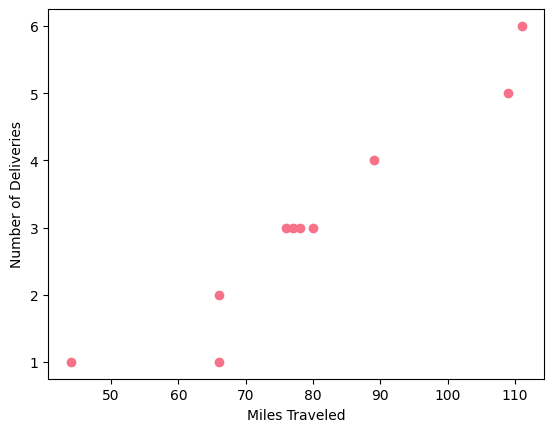

In [14]:
plt.scatter(df["Miles Traveled"], df["Number of Deliveries"])
plt.xlabel("Miles Traveled")
plt.ylabel("Number of Deliveries")
plt.show()

9. Create scatter plot between Miles traveled and Gas Price

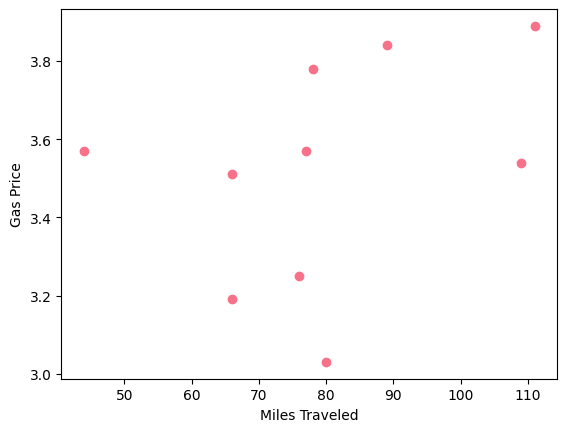

In [15]:
plt.scatter(df["Miles Traveled"], df["Gas Price"])
plt.xlabel("Miles Traveled")
plt.ylabel("Gas Price")
plt.show()

10. Create scatter plot between Number of Deliveries and Gas Price

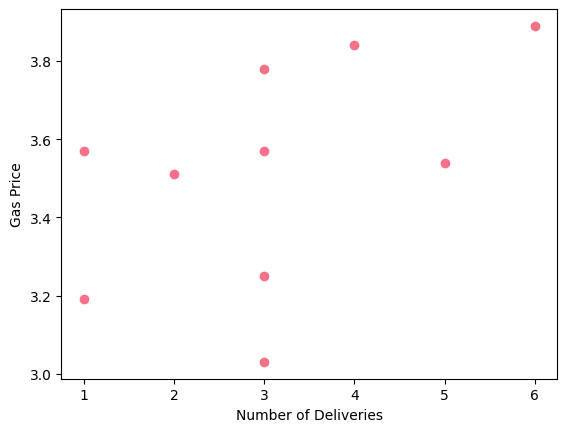

In [16]:
plt.scatter(df["Number of Deliveries"], df["Gas Price"])
plt.xlabel("Number of Deliveries")
plt.ylabel("Gas Price")
plt.show()

11. Calculate pearson's correlation coefficient and p-value between Miles Traveled and Number of Deliveries

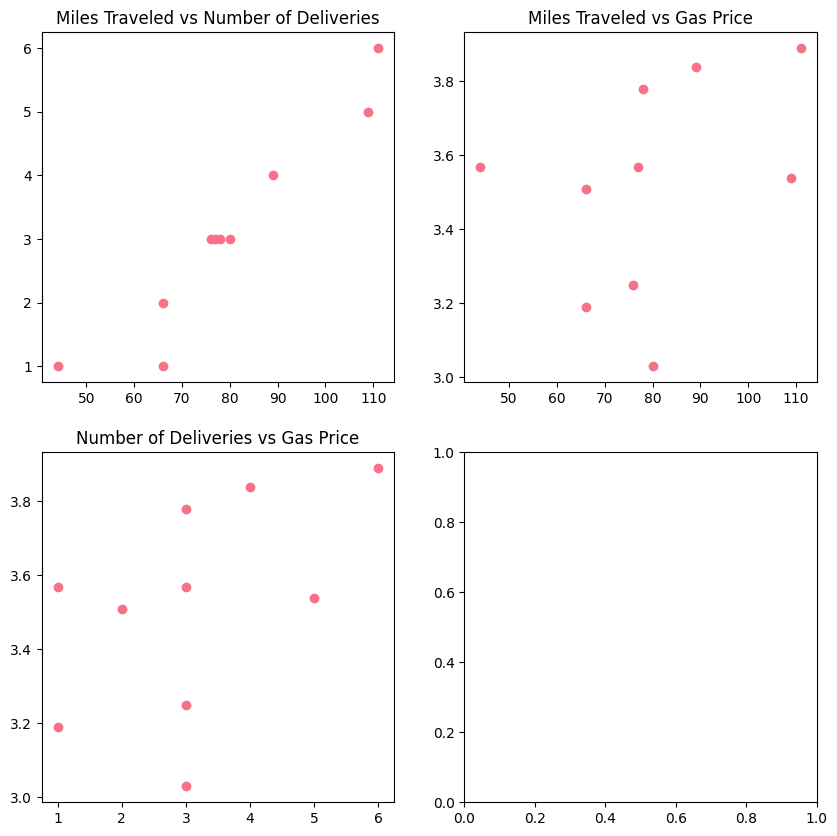

In [17]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].scatter(df["Miles Traveled"], df["Number of Deliveries"])
ax[0,1].scatter(df["Miles Traveled"], df["Gas Price"])
ax[1,0].scatter(df["Number of Deliveries"], df["Gas Price"])

ax[0,0].set_title("Miles Traveled vs Number of Deliveries")
ax[0,1].set_title("Miles Traveled vs Gas Price")
ax[1,0].set_title("Number of Deliveries vs Gas Price")
plt.show()

12. Calculate pearson's correlation coefficient and p-value between Miles Traveled and Gas Price

In [18]:
result = pearsonr(df['Miles Traveled'], df['Gas Price'])
print("Miles Traveled vs Gas Price")
print("r-squared: ", result[0]**2)
print("p-value:", results[1])
print("correlation coeffiecient:", result[0])

Miles Traveled vs Gas Price
r-squared:  0.12659095980629198
p-value: 0.00010667565429896801
correlation coeffiecient: 0.35579623354708517


13. Calculate pearson's correlation coefficient and p-value between Number of Deliveries and Gas Price

In [19]:
result = pearsonr(df['Number of Deliveries'], df['Gas Price'])
print("Number of Deliveries and Gas Price")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Number of Deliveries and Gas Price
correlation coefficient: 0.4982421647401633
p-value: 0.142741207670319


### Correlation Summary

14. Create the correlation summary

In [20]:
correlation = df.corr()
correlation

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
Miles Traveled,1.000000,0.955898,0.355796,0.928179
Number of Deliveries,0.955898,1.000000,0.498242,0.916443
Gas Price,0.355796,0.498242,1.000000,0.267212
Travel Time,0.928179,0.916443,0.267212,1.000000


15. Create a correlation matrix

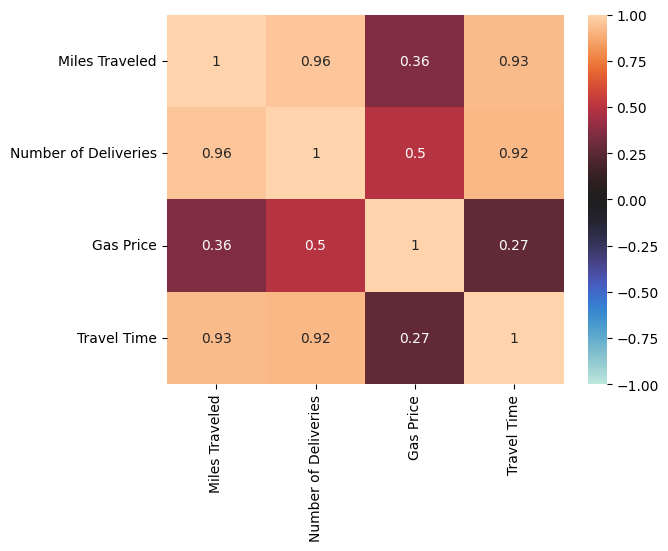

In [21]:
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center =0)
plt.show()

## Building Different Regression Models

Find the best regression model

16. Set independent and dependent variables

In [26]:
x = df[['Miles Traveled', 'Number of Deliveries']]
x = sm.add_constant(x)
y = df['Travel Time']

17. Build and train the model

In [27]:
mlr_model = LinearRegression()

mlr_model.fit(x, y)

y_pred = mlr_model.predict(x)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 3.732158131682609
Coefficients: [0.         0.02622257 0.18404052]


18. Display the statistical summary

In [28]:
olsmod = sm.OLS(y, x).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     23.72
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           0.000763
Time:                        14:54:38   Log-Likelihood:                -1.9830
No. Observations:                  10   AIC:                             9.966
Df Residuals:                       7   BIC:                             10.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7322      0.887      4.208      0.004       1.635       5.830
Miles Traveled           0.0262      0.020      1.310      0.232      -0.021       0.074
Number of Deliveries     0.1840      0.251      0.733      0.487      -0.409       0.777
==============================================================================
Omnibus:                        1.340   Durbin-Watson:                   2.402
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.867
Skew:                           0.654   Prob(JB):                        0.648
Kurtosis:                       2.393   Cond. No.                         670.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

19. Display the $R^2$

In [29]:
olsmod.rsquared

np.float64(0.871399502997586)